# Students Do: Clustering costumers for e-commerce

Once you have prepared the data, it's time to start looking for patterns that could lead you to define customer clusters. After talking with the CFO of the company about the next quarter goals, you figured out that one way to understand customers, from the available data, is to cluster them according to their spending capacity, however you have to find how many groups you can define.

You decide to use your new unsupervised learning skills and put k-means in action!

In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

## Instructions

Accomplish the following tasks and use K-Means to cluster the customers data.

 * Load the data

In [2]:
# Loading data
file_path = Path("../Resources/shopping_data_cleaned.csv")
df_shopping = pd.read_csv(file_path)
df_shopping.head()

,Age,Annual Income,Spending Score,Previous Shopper
0,-0.295240,-0.118424,-1.625204,1
1,-0.979855,0.051970,-0.053060,1
2,-0.009984,1.244733,0.208964,0
3,-0.181138,0.392760,-0.839132,1
4,-0.124086,1.074338,-0.577108,0


In [3]:
# Identify the best number of clusters using the elbow curve
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_shopping)
    inertia.append(km.inertia_)


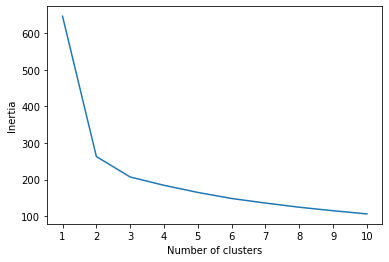

In [4]:
# Plot the elbow curve to find the best candidate(s) for k
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

* (Optional) Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

In [9]:
# get_clusters function
# def get_clusters(k, data):

model = KMeans(n_clusters=2, random_state=5)

model.fit(df_shopping)

predictions = model.predict(df_shopping)
print(predictions)


[1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1]


* Create a function called show_clusters(df) that will create a scatter plot of a dataframe's Annual Income and Spending Score (1-100) columns, and color by the cluster.

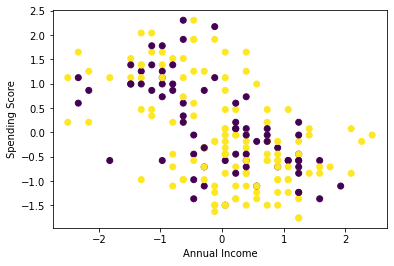

In [10]:
# show_clusters function
def show_clusters(df):
    plt.scatter(x=df_shopping["Annual Income"], y=df_shopping['Spending Score'], c=df_shopping['Previous Shopper'])
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()

show_clusters(df_shopping)

* Create a 2D-Scatter plot to analyze the clusters using `x="Annual Income"` and `y="Spending Score (1-100)"`.

**Analyzing Clusters with the First Best Value of `k`**